In [54]:
import numpy as np
import mne
import matplotlib.pyplot as plt

In [105]:
sfreq = 160
ch_names = ['EEG1', 'EEG2']
ch_types = ['eeg', 'eeg']

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

n_times = 1024
n_epochs = 40
seed = 42
rng = np.random.RandomState(seed)
noise = rng.randn(n_epochs, len(ch_names), n_times)


# Add a 50 Hz sinusoidal burst to the noise and ramp it.
t = np.arange(n_times, dtype=np.float64) / sfreq
signal = np.sin(np.pi * 2. * 10. * t)  # 50 Hz sinusoid signal
pnts = 50/sfreq
min_t, max_t = (t.max()/2)-pnts, (t.max()/2)+pnts
signal[np.logical_or(t < min_t, t > max_t)] = 0.  # Hard windowing
on_time = np.logical_and(t >= min_t, t <= max_t)
signal[on_time] *= np.hanning(on_time.sum())  # Ramping
data = noise + signal

reject = dict(eeg=4000)
events = np.empty((n_epochs, 3), dtype=int)
first_event_sample = 100
event_id = dict(sin10hz=1)
for k in range(n_epochs):
    events[k, :] = first_event_sample + k * n_times, 0, event_id['sin10hz']

# epochs = mne.EpochsArray(data=data, info=info, events=events, event_id=event_id)

# epochs.average().plot()
# freqs = np.arange(7., 100., 3.)
# vmin, vmax = -3., 3.  # Define our color limits.

Not setting metadata
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


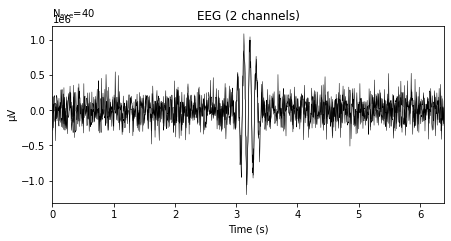

In [106]:
epochs = mne.EpochsArray(data=data, info=info, events=events, event_id=event_id)
epochs.average().plot(picks=[0,1]);
frequencies = np.arange(7., 30., 1)

In [107]:
# Least smoothing - Most variance/ background fluctuations
n_cycles = frequencies/2.0 #( T = n_cycles/s_freq)
time_bandwidth = 2.0 #BW = time_bandwidth/T

In [117]:
# Less F smoothing, More T smoothing
n_cycles = frequencies/8 #( T = n_cycles/s_freq)
time_bandwidth = 2 #BW = time_bandwidth/T

Applying baseline correction (mode: mean)


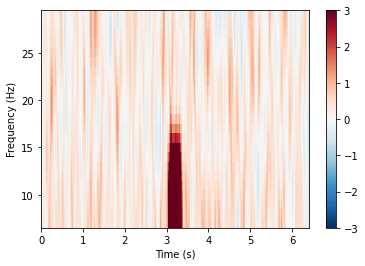

In [118]:
MT_power = mne.time_frequency.tfr_multitaper(epochs, freqs=frequencies, n_cycles= n_cycles,
            time_bandwidth=time_bandwidth, return_itc=False)
MT_power.plot([1],mode='mean',baseline=(0., 0.1), vmin=-3, vmax=3);

In [111]:
# Less T smoothing, More F smoothing
n_cycles = frequencies/2 #( T = n_cycles/s_freq)
time_bandwidth = 8 #BW = time_bandwidth/T

Applying baseline correction (mode: mean)


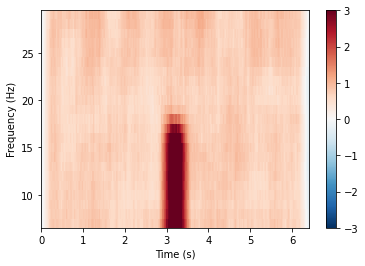

In [112]:
MT_power = mne.time_frequency.tfr_multitaper(epochs, freqs=frequencies, n_cycles= n_cycles,
            time_bandwidth=time_bandwidth, return_itc=False)
MT_power.plot([1],mode='mean',baseline=(0., 0.1), vmin=-3, vmax=3);

No baseline correction applied


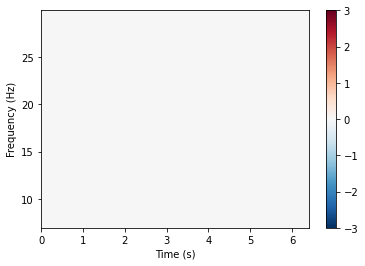

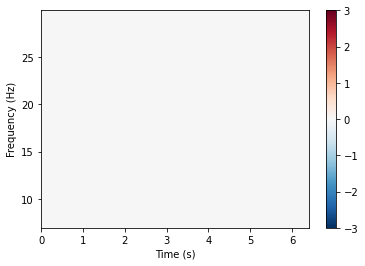

In [99]:
SW_power = mne.time_frequency.tfr_stockwell(epochs, fmin=7, fmax=30,width=1)
SW_power.plot( vmin=-3, vmax=3);

No baseline correction applied


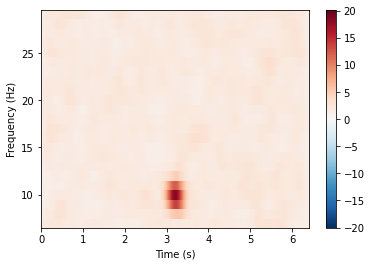

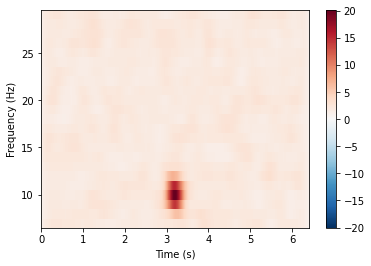

[<Figure size 432x288 with 2 Axes>, <Figure size 432x288 with 2 Axes>]

In [123]:
power = mne.time_frequency.tfr_morlet(epochs, freqs=frequencies,n_cycles=frequencies, return_itc=False)
power.plot()